In [5]:
from sentence_transformers import SentenceTransformer, util
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import scipy.cluster.hierarchy as sch

%matplotlib inline

In [8]:
def neural_embeddings(corpus):
    model_embedder = SentenceTransformer('all-MiniLM-L6-v2')#modelo pre-entrenado
    embeddings = model_embedder.encode(corpus, 
                                        convert_to_tensor=False, 
                                        show_progress_bar=True) #generamos las incrustaciones 

    embeddings = embeddings /  np.linalg.norm(embeddings, axis=1, keepdims=True) #normalizamos

    return embeddings

In [12]:
def cosine_similarity(corpus):
    embeddings = neural_embeddings(corpus)
    cosine_scores = util.cos_sim(embeddings, embeddings)

    return cosine_scores

In [13]:
def dendrogram_HCA(corpus):
    cosine_scores = cosine_similarity(corpus)
    HCA = linkage(cosine_scores, 'complete')
    dendrogram = sch.dendrogram(HCA)

    cluster = fcluster(HCA, t=4.5 , criterion='distance')
    return cluster

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

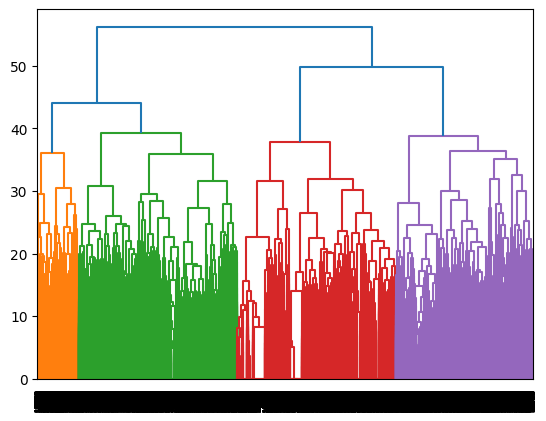

In [17]:
corpus = pd.read_csv('C:/Users/Usuario/Desktop/Topic Modelling/Dataset/dataset_classroom.csv')
labels = dendrogram_HCA(corpus['sentences'])
corpus['cluster'] = labels

In [18]:
corpus

,sentences,cluster
0,L app,12536
1,my grandma had a seizure and died because of y...,11558
2,The pdf scanner keeps croping pages so I need ...,1422
3,L app,12536
4,Faking auafel,231
...,...,...
19995,They make me do unwanted class work like the o...,4587
19996,Yuh,8072
19997,Cg,8686
19998,Lame!!,9955
